In [10]:
import seaborn as sns
import scipy.stats as stats
import pylab
from sklearn import preprocessing

In [1]:
import sys 
import csv 
import numpy as np
import pandas as pd

data = pd.read_csv('/Users/han-eunbi/Desktop/UIUC/23Spring/IE517/HY_Universe_corporate bond.csv')
data.head()

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
0,000324AA1,FLECIN,7/1/2014,7/1/2019,10/23/2017,Nan,Nan,Nan,Nan,12.00,...,0.006645,0.292359,5,0.521595,3105926.765,2000000.0,18980000.0,60000.0,3.541176,1
1,00080QAB1,RBS,3/15/2004,6/4/2018,Nan,Ba1,BB+,BBB,BB+,4.65,...,0.425018,0.974071,2,0.337071,1721696.774,1160000.0,11197000.0,5000.0,18.412903,3
2,00081TAD0,ACCO,5/14/2010,3/15/2015,Nan,WR,NR,BB+,NR,10.63,...,0.115207,0.594470,5,0.467742,4200313.433,3520000.0,14000000.0,24000.0,6.477612,1
3,00081TAH1,ACCO,6/17/2013,4/30/2020,Nan,WR,NR,WD,NR,6.75,...,0.426332,0.892462,3,0.212864,6321559.783,5487500.0,18459000.0,30000.0,27.038043,1
4,00081TAJ7,ACCO,12/22/2016,12/15/2024,12/15/2019,B1,BB-,BB,BB-,5.25,...,0.157216,0.690722,5,0.500000,5936714.286,3305500.0,72760000.0,90000.0,9.238095,1


In [2]:
data.columns.values

array(['CUSIP', 'Ticker', 'Issue Date', 'Maturity', '1st Call Date',
       'Moodys', 'S_and_P', 'Fitch', 'Bloomberg Composite Rating',
       'Coupon', 'Issued Amount', 'Maturity Type', 'Coupon Type',
       'Maturity At Issue months', 'Industry', 'LiquidityScore',
       'Months in JNK', 'Months in HYG', 'Months in Both', 'IN_ETF',
       'LIQ SCORE', 'n_trades', 'volume_trades', 'total_median_size',
       'total_mean_size', 'n_days_trade', 'days_diff_max',
       'percent_intra_dealer', 'percent_uncapped', 'bond_type',
       'Client_Trade_Percentage', 'weekly_mean_volume',
       'weekly_median_volume', 'weekly_max_volume', 'weekly_min_volume',
       'weekly_mean_ntrades', 'weekly_median_ntrades'], dtype=object)

In [19]:
data.columns[29]

'bond_type'

## Summarize Data

In [5]:
print(data.describe())

            Coupon  Issued Amount  Maturity At Issue months  LiquidityScore  \
count  2721.000000   2.721000e+03               2721.000000     2721.000000   
mean     10.307872   8.299295e+08                113.968997       18.218230   
std      63.051382   5.802790e+08                101.893176        7.872071   
min       0.000000   3.700000e+08                 11.930000        4.388758   
25%       5.000000   5.000000e+08                 65.170000       12.738630   
50%       6.250000   6.500000e+08                 97.370000       16.538471   
75%       7.750000   1.000000e+09                121.770000       22.120108   
max     999.000000   7.364026e+09               1217.570000       54.673908   

         LIQ SCORE      n_trades  volume_trades  total_median_size  \
count  2721.000000   2721.000000   2.721000e+03       2.721000e+03   
mean      0.182182   2700.696435   7.222372e+08       5.361476e+05   
std       0.078721   5572.262205   1.027825e+09       4.193546e+05   
min     

In [4]:
for i in data.columns:
    if 'Nan' in data[i].tolist():
        print(i)

1st Call Date
Moodys
S_and_P
Fitch
Bloomberg Composite Rating
Months in JNK
Months in HYG
Months in Both


In [21]:
data['bond_type']

0       5
1       2
2       5
3       3
4       5
       ..
2716    1
2717    5
2718    5
2719    3
2720    3
Name: bond_type, Length: 2721, dtype: int64

### Drop Features
1. Moodys
2. S_and_P
3. Fitch 

NAN, NR all of these are nan

### Categorical Features

- string
1. Bloomberg Composite Rating
2. Maturity Type
3. Coupon Type
4. Industry 
5. IN_ETF 

6. Months in JNK
7. Months in HYG
8. Months in Both 

- int
1. bond_type


## - Summary Statistics 

In [28]:
#categorical
unique = set(data['bond_type'])
print('unique label values for bond_type columns: ',unique,'\n')

unique = set(data['Bloomberg Composite Rating'])
print('Bloomberg Composite Rating: ',unique,'\n')

unique = set(data['Maturity Type'])
print('Maturity Type: ',unique,'\n')

unique = set(data['Coupon Type'])
print('Coupon Type: ',unique,'\n')

unique = set(data['Industry'])
print('Industry: ',unique,'\n')

unique = set(data['IN_ETF'])
print('IN_ETF: ',unique,'\n')


unique label values for bond_type columns:  {1, 2, 3, 4, 5} 

Bloomberg Composite Rating:  {'A+', 'AA-', 'BB', 'C', 'DD+', 'Nan', 'A', 'NR', 'AA', 'BBB', 'BBB+', 'BB-', 'CC', 'CC+', 'B-', 'DDD', 'C+', 'BB+', 'CC-', 'CCC-', 'B+', 'BBB-', 'A-', 'AA+', 'CCC+', 'AAA', 'CCC', 'B'} 

Maturity Type:  {'CALL/PUT', 'SINKABLE', 'CALL/SINK', 'SINK/EXT', 'CALL/REF/SINK', 'CALLABLE', 'CALL/EXT', 'NORMAL', 'EXTENDIBLE', 'PUTABLE', 'PERP/CALL', 'AT MATURITY'} 

Coupon Type:  {'DEFAULTED', 'FLOATING', 'VARIABLE', 'PAY-IN-KIND', 'STEP CPN', 'FUNGED', 'EXCHANGED', 'FIXED', 'ZERO COUPON', 'FLAT TRADING'} 

Industry:  {'Real Estate', 'Investment Companies', 'Mining', 'Building Materials', 'Machinery-Diversified', 'Electronics', 'Aerospace/Defense', 'Oil Gas', 'Electric', 'Household Products/Wares', 'Diversified Finan Serv', 'Gas', 'Banks', 'Metal Fabricate/Hardware', 'Housewares', 'Multi-National', 'REITS', 'Distribution/Wholesale', 'Home Builders', 'Chemicals', 'Energy-Alternate Sources', 'Hand/Machine T

In [42]:
print("Maturity At Issue Month: Mean ="+str(np.mean(data['Maturity At Issue months']))+
      "| SD="+str(np.std(data['Maturity At Issue months']))+'\n')

print("LiquidityScore: Mean ="+str(np.mean(data['LiquidityScore']))+
      "| SD="+str(np.std(data['LiquidityScore']))+'\n')

print("LIQ SCORE: Mean ="+str(np.mean(data['LIQ SCORE']))+
      "| SD="+str(np.std(data['LIQ SCORE']))+'\n')

print("n_trades: Mean ="+str(np.mean(data['n_trades']))+
      "| SD="+str(np.std(data['n_trades']))+'\n')


print("Client_Trade_Percentage: Mean ="+str(np.mean(data['Client_Trade_Percentage']))+
      "| SD="+str(np.std(data['Client_Trade_Percentage']))+'\n')





Maturity At Issue Month: Mean =113.96899669239242| SD=101.8744511767218

LiquidityScore: Mean =18.218229647083422| SD=7.870624330410276

LIQ SCORE: Mean =0.18218229647004755| SD=0.07870624330186442

n_trades: Mean =2700.6964351341417| SD=5571.238174453881

Client_Trade_Percentage: Mean =0.37964789806247706| SD=0.1445187592195361



In [51]:
# list 2-9
data.corr()


,Coupon,Issued Amount,Maturity At Issue months,LiquidityScore,LIQ SCORE,n_trades,volume_trades,total_median_size,total_mean_size,n_days_trade,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
Coupon,1.000000,-0.014238,0.098844,-0.042302,-0.042302,-0.023330,-0.026717,0.044601,0.026891,-0.028336,...,-0.014316,-0.045897,0.051856,0.029125,-0.027724,-0.028584,-0.026362,-0.014438,-0.028045,-0.018326
Issued Amount,-0.014238,1.000000,0.008601,0.134930,0.134930,0.156948,0.326310,0.062343,0.078362,0.068113,...,0.052617,-0.112369,-0.070714,-0.049513,0.382050,0.396947,0.261469,0.105208,0.274420,0.188765
Maturity At Issue months,0.098844,0.008601,1.000000,0.072507,0.072507,0.038839,-0.015227,-0.115086,-0.138581,0.029530,...,0.104127,0.100168,0.102990,-0.040186,-0.023002,-0.032868,-0.017137,-0.020392,0.036729,0.006573
LiquidityScore,-0.042302,0.134930,0.072507,1.000000,1.000000,0.803139,0.786718,-0.627008,-0.656980,0.873040,...,0.671903,0.666321,-0.368492,-0.496127,0.385978,0.371213,0.481142,0.025707,0.673569,0.239951
LIQ SCORE,-0.042302,0.134930,0.072507,1.000000,1.000000,0.803139,0.786718,-0.627008,-0.656980,0.873040,...,0.671903,0.666321,-0.368492,-0.496127,0.385978,0.371213,0.481142,0.025707,0.673569,0.239951
n_trades,-0.023330,0.156948,0.038839,0.803139,0.803139,1.000000,0.769322,-0.425801,-0.468673,0.704310,...,0.415695,0.396880,-0.208283,-0.348408,0.309053,0.285998,0.432955,-0.041335,0.804753,0.234165
volume_trades,-0.026717,0.326310,-0.015227,0.786718,0.786718,0.769322,1.000000,-0.276204,-0.278564,0.772564,...,0.387555,0.241814,-0.452584,-0.327922,0.503159,0.479018,0.616802,-0.037198,0.602055,0.144272
total_median_size,0.044601,0.062343,-0.115086,-0.627008,-0.627008,-0.425801,-0.276204,1.000000,0.930213,-0.490428,...,-0.650101,-0.826443,0.081332,0.486900,0.060608,0.053381,-0.066253,0.138658,-0.378970,-0.096283
total_mean_size,0.026891,0.078362,-0.138581,-0.656980,-0.656980,-0.468673,-0.278564,0.930213,1.000000,-0.494483,...,-0.679317,-0.862401,0.086759,0.502385,0.052018,0.054723,-0.087748,0.177104,-0.428501,-0.100327
n_days_trade,-0.028336,0.068113,0.029530,0.873040,0.873040,0.704310,0.772564,-0.490428,-0.494483,1.000000,...,0.500944,0.433119,-0.444068,-0.406258,0.168114,0.169430,0.323094,-0.118874,0.416313,0.026527


# Plots
- LinePlot
- corrPlot
- HeatMap
- scatterPlot

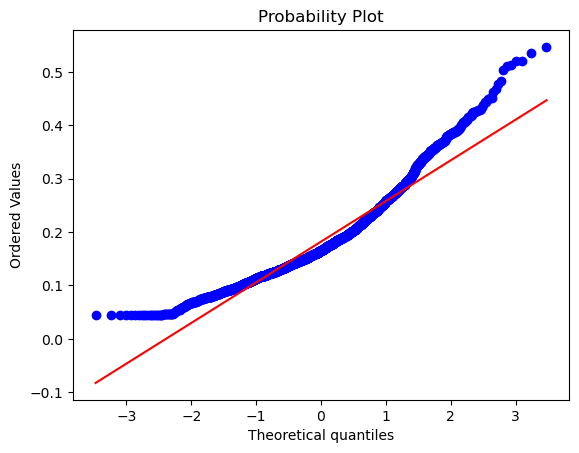

In [11]:
#QQ Plot

stats.probplot(data['LIQ SCORE'],dist='norm',plot=pylab)
pylab.show()

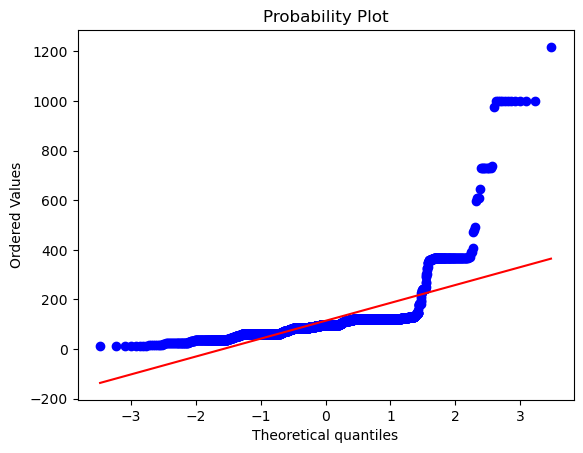

In [12]:
#QQ Plot

stats.probplot(data['Maturity At Issue months'],dist='norm',plot=pylab)
pylab.show()

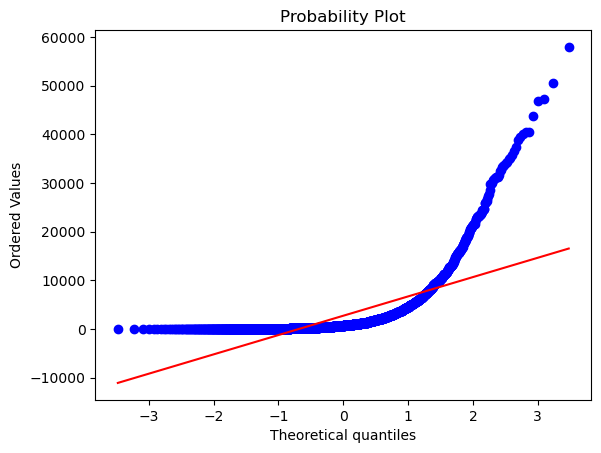

In [43]:
#QQ Plot

stats.probplot(data['n_trades'],dist='norm',plot=pylab)
pylab.show()

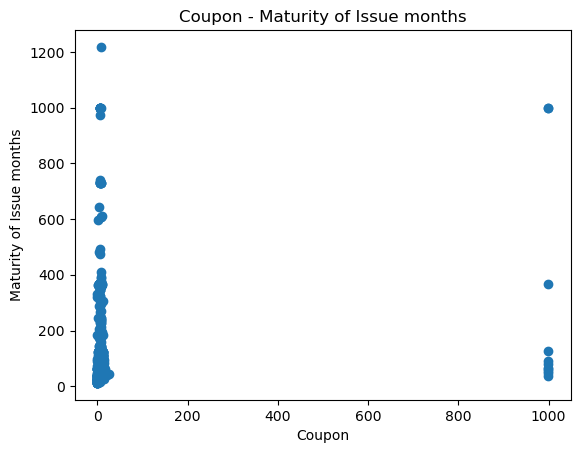

In [13]:
# Scatter plot
plt.xlabel('Coupon')
plt.ylabel('Maturity of Issue months')
plt.title('Coupon - Maturity of Issue months')
plt.scatter(data['Coupon'],data['Maturity At Issue months'])

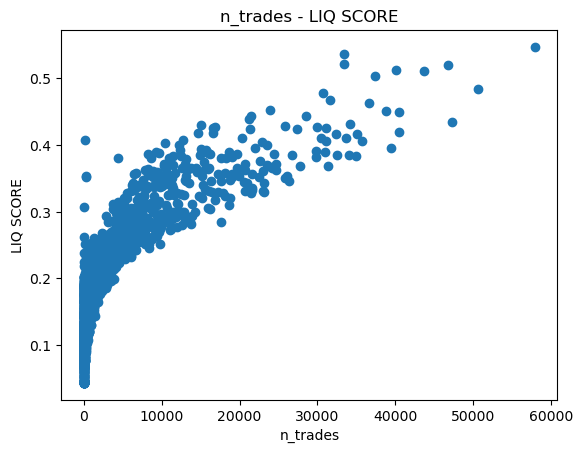

In [47]:
# Scatter plot
plt.xlabel('n_trades')
plt.ylabel('LIQ SCORE')
plt.title('n_trades - LIQ SCORE')
plt.scatter(data['n_trades'],data['LIQ SCORE'])

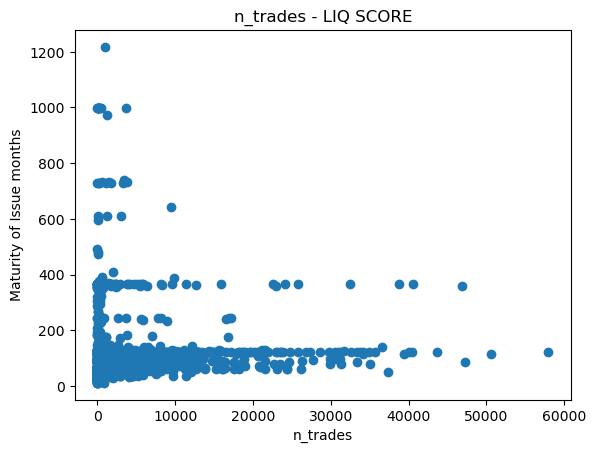

In [50]:
# Scatter plot
plt.xlabel('n_trades')
plt.ylabel('Maturity of Issue months')
plt.title('n_trades - LIQ SCORE')
plt.scatter(data['n_trades'],data['Maturity At Issue months'])

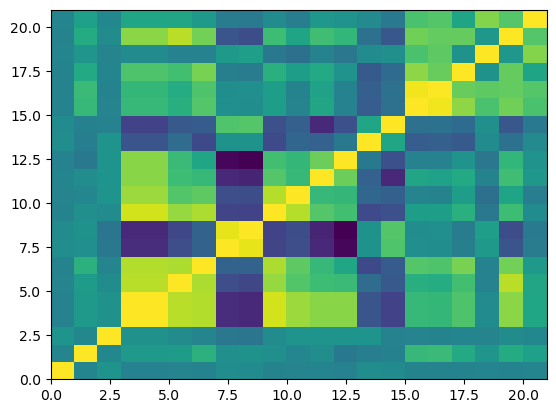

In [8]:
# HeatMap
import matplotlib.pyplot as plt
corMat = pd.DataFrame(data.corr())
plt.pcolor(corMat)
plt.show()

In [52]:
print("My name is Eunbi Han")
print("My NetID is eunbih2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Eunbi Han
My NetID is eunbih2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
